In [1]:
import cv2, os, time, numpy as np, matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
start_time = time.time()

def load_images_from_folder(folder):
    images = []
    index = 0
    for filename in os.listdir(folder):
        img = image.load_img(os.path.join(folder,filename), target_size=(224, 224))
        img_arr = image.img_to_array(img)
        img_arr = np.expand_dims(img_arr, axis=0)
        if img is not None:
            images.append((img_arr,img,index))
            index+=1
    return images

l = load_images_from_folder('/home/mateus/Documents/Universidade/TCC/buscador/images')

model2 = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=None)


features = []
for i in range(len(l)):
    features.append((model2.predict(l[i][0]),i))
    
for i in range(len(l)):
    features[i] = (features[i][0].flatten(),i)
    features[i] = (features[i][0]/np.linalg.norm(features[i][0]),i)
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 14.238309144973755 seconds ---


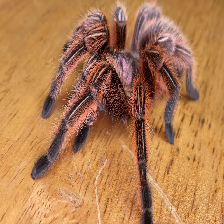

In [2]:
l[3][1]

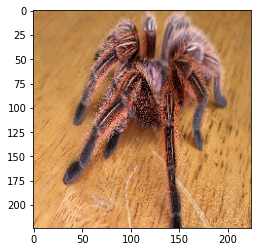

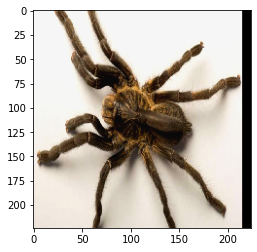

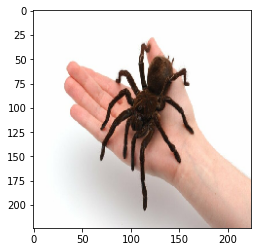

--- 0.842688798904419 seconds ---


In [3]:
start_time = time.time()

similarities = []
for i in range(len(features)):
    similarities.append((cosine_similarity(features[3][0].reshape(1,-1), features[i][0].reshape(1,-1)),i))
    
def takeFirst(elem):
    return elem[0]

similarities.sort(key=takeFirst, reverse=True)

for i in range(3):
    j = similarities[i][1]
    plt.figure()
    plt.imshow(l[j][1]) 
    plt.show()
    
    
print("--- %s seconds ---" % (time.time() - start_time))